In [1]:
%matplotlib inline
# %matplotlib

In [2]:
import time

In [3]:
from __future__ import division,print_function

In [4]:
from spartan.utils.sklearn import model_assessment, feature_selection
from spartan.utils.sklearn import pandas_helpers

In [5]:
from collections import Counter, defaultdict
import math

import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, RandomizedPCA, KernelPCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, univariate_selection
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix



In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sns.set_context('poster')

In [8]:
data = pd.read_excel("/home/gus/MEGAsync/zim/main/BCH/Projects/Naresh/RNAseq/genes_log3WH.xlsx")

In [9]:
data.head()

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,1WH1_FPKM,...,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM,log1WH,log1WK,log3WH,log3WK,log12WH,log12WK
0,ENSMUSG00000028167,-,-,ENSMUSG00000028167,Bdh2,-,chr3:135281220-135304426,-,-,0.000056,...,0.205478,0.077530,0.342887,0.237588,-11.851611,-1.650177,0,-1.406152,0.738749,0.209478
1,ENSMUSG00000052414,-,-,ENSMUSG00000052414,Gm28047,-,chr15:102523838-102625464,-,-,0.000503,...,0.676173,0.319848,0.000443,0.000000,-10.392320,-11.320051,0,-1.080006,-10.576838,NaN
2,ENSMUSG00000076128,-,-,ENSMUSG00000076128,Mir686,-,chr14:54614119-54617995,-,-,0.104032,...,82.695900,0.000000,23.360600,0.438910,-9.634645,-2.978292,0,NaN,-1.823738,-7.557747
3,ENSMUSG00000091071,-,-,ENSMUSG00000091071,1700030C10Rik,-,chr12:20804380-20815779,-,-,0.021897,...,10.595400,0.037717,0.009808,0.000000,-8.918483,-7.727768,0,-8.134019,-10.077155,NaN
4,ENSMUSG00000042251,-,-,ENSMUSG00000042251,Pm20d1,-,chr1:131797380-131821473,-,-,0.033215,...,5.645610,0.321783,0.239373,0.058433,-7.409172,-4.941761,0,-4.132969,-4.559797,-6.594212


In [10]:
data.columns

Index([u'tracking_id', u'class_code', u'nearest_ref_id', u'gene_id',
       u'gene_short_name', u'tss_id', u'locus', u'length', u'coverage',
       u'1WH1_FPKM', u'1WK1_FPKM', u'3WH1_FPKM', u'3WK1_FPKM', u'12WH2_FPKM',
       u'12WK2_FPKM', u'log1WH', u'log1WK', u'log3WH', u'log3WK', u'log12WH',
       u'log12WK'],
      dtype='object')

In [12]:
data_fpkm = data[['tracking_id','1WH1_FPKM','1WK1_FPKM','3WH1_FPKM','3WK1_FPKM','12WH2_FPKM','12WK2_FPKM']]
data_fpkm.head()

,tracking_id,1WH1_FPKM,1WK1_FPKM,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM
0,ENSMUSG00000028167,0.000056,0.065465,0.205478,0.077530,0.342887,0.237588
1,ENSMUSG00000052414,0.000503,0.000264,0.676173,0.319848,0.000443,0.000000
2,ENSMUSG00000076128,0.104032,10.493700,82.695900,0.000000,23.360600,0.438910
3,ENSMUSG00000091071,0.021897,0.049984,10.595400,0.037717,0.009808,0.000000
4,ENSMUSG00000042251,0.033215,0.183693,5.645610,0.321783,0.239373,0.058433


In [13]:
data_fpkm = data_fpkm.set_index('tracking_id').copy()
data_fpkm.head()

,1WH1_FPKM,1WK1_FPKM,3WH1_FPKM,3WK1_FPKM,12WH2_FPKM,12WK2_FPKM
tracking_id,,,,,,
ENSMUSG00000028167,0.000056,0.065465,0.205478,0.077530,0.342887,0.237588
ENSMUSG00000052414,0.000503,0.000264,0.676173,0.319848,0.000443,0.000000
ENSMUSG00000076128,0.104032,10.493700,82.695900,0.000000,23.360600,0.438910
ENSMUSG00000091071,0.021897,0.049984,10.595400,0.037717,0.009808,0.000000
ENSMUSG00000042251,0.033215,0.183693,5.645610,0.321783,0.239373,0.058433


In [14]:
fpkm = data_fpkm.T.copy()

In [15]:
fpkm.head()

tracking_id,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,ENSMUSG00000020017,ENSMUSG00000028699,...,ENSMUSG00000031965,ENSMUSG00000049804,ENSMUSG00000062151,ENSMUSG00000046532,ENSMUSG00000061603,ENSMUSG00000046958,ENSMUSG00000076236,ENSMUSG00000030209,ENSMUSG00000100046,ENSMUSG00000098754
1WH1_FPKM,0.000056,0.000503,0.104032,0.021897,0.033215,2.11964,0.011293,1.18057,0.654752,0.042601,...,0.004461,0.003568,0.003236,0.003127,0.002764,0.002607,0.002091,0.001187,0.000738,0.000063
1WK1_FPKM,0.065465,0.000264,10.493700,0.049984,0.183693,9.51395,0.031213,2.08476,3.433130,2.577210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
3WH1_FPKM,0.205478,0.676173,82.695900,10.595400,5.645610,295.24000,1.343170,126.90700,68.837300,4.083650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3WK1_FPKM,0.077530,0.319848,0.000000,0.037717,0.321783,305.50000,0.450592,48.58040,109.721000,2.689990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12WH2_FPKM,0.342887,0.000443,23.360600,0.009808,0.239373,429.57200,0.534761,59.43200,209.012000,1.609380,...,0.000000,0.022381,0.000000,0.072850,0.018577,0.000000,0.000000,0.000532,0.027166,0.000000


In [16]:
fpkm_scaled = (fpkm - fpkm.mean())/fpkm.std()

In [17]:
fpkm_scaled

tracking_id,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,ENSMUSG00000020017,ENSMUSG00000028699,...,ENSMUSG00000031965,ENSMUSG00000049804,ENSMUSG00000062151,ENSMUSG00000046532,ENSMUSG00000061603,ENSMUSG00000046958,ENSMUSG00000076236,ENSMUSG00000030209,ENSMUSG00000100046,ENSMUSG00000098754
1WH1_FPKM,-1.203521,-0.590463,-0.601375,-0.408704,-0.467648,-1.027568,-0.825859,-0.474908,-0.821636,-1.525484,...,1.710755,-0.084467,2.041241,-0.347102,-0.106537,2.041241,2.041241,1.838641,-0.354605,-0.406811
1WK1_FPKM,-0.694909,-0.591313,-0.279499,-0.402197,-0.400445,-0.986460,-0.805621,-0.473593,-0.787554,-0.027846,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.407213
3WH1_FPKM,0.393795,1.817220,1.957350,2.041223,2.038832,0.602000,0.527300,-0.292010,0.014743,0.862272,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
3WK1_FPKM,-0.601096,0.547491,-0.604598,-0.405039,-0.338774,0.659039,-0.379540,-0.405954,0.516253,0.038793,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
12WH2_FPKM,1.462255,-0.590678,0.119122,-0.411505,-0.375578,1.348803,-0.294026,-0.390168,1.734231,-0.599713,...,-0.614913,2.015180,-0.408248,2.037896,2.018582,-0.408248,-0.408248,0.500963,2.040511,-0.409072
12WK2_FPKM,0.643475,-0.592256,-0.591000,-0.413778,-0.456386,-0.595814,1.777747,2.036633,-0.656036,1.251978,...,0.748897,-0.482678,-0.408248,-0.328616,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,2.041240


In [18]:
fpkm_labels = fpkm_scaled.iloc[:,-2:].copy()
fpkm_labels['genotype'] = ['HET','KO']*3
fpkm_labels['week'] = ['wk1']*2 + ['wk3']*2 + ['wk12']*2 
fpkm_labels = fpkm_labels[['genotype','week']].copy()

In [19]:
fpkm_labels

tracking_id,genotype,week
1WH1_FPKM,HET,wk1
1WK1_FPKM,KO,wk1
3WH1_FPKM,HET,wk3
3WK1_FPKM,KO,wk3
12WH2_FPKM,HET,wk12
12WK2_FPKM,KO,wk12


In [20]:
fpkm_scaled

tracking_id,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,ENSMUSG00000020017,ENSMUSG00000028699,...,ENSMUSG00000031965,ENSMUSG00000049804,ENSMUSG00000062151,ENSMUSG00000046532,ENSMUSG00000061603,ENSMUSG00000046958,ENSMUSG00000076236,ENSMUSG00000030209,ENSMUSG00000100046,ENSMUSG00000098754
1WH1_FPKM,-1.203521,-0.590463,-0.601375,-0.408704,-0.467648,-1.027568,-0.825859,-0.474908,-0.821636,-1.525484,...,1.710755,-0.084467,2.041241,-0.347102,-0.106537,2.041241,2.041241,1.838641,-0.354605,-0.406811
1WK1_FPKM,-0.694909,-0.591313,-0.279499,-0.402197,-0.400445,-0.986460,-0.805621,-0.473593,-0.787554,-0.027846,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.407213
3WH1_FPKM,0.393795,1.817220,1.957350,2.041223,2.038832,0.602000,0.527300,-0.292010,0.014743,0.862272,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
3WK1_FPKM,-0.601096,0.547491,-0.604598,-0.405039,-0.338774,0.659039,-0.379540,-0.405954,0.516253,0.038793,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
12WH2_FPKM,1.462255,-0.590678,0.119122,-0.411505,-0.375578,1.348803,-0.294026,-0.390168,1.734231,-0.599713,...,-0.614913,2.015180,-0.408248,2.037896,2.018582,-0.408248,-0.408248,0.500963,2.040511,-0.409072
12WK2_FPKM,0.643475,-0.592256,-0.591000,-0.413778,-0.456386,-0.595814,1.777747,2.036633,-0.656036,1.251978,...,0.748897,-0.482678,-0.408248,-0.328616,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,2.041240


In [69]:
full_table = fpkm_labels.join(fpkm_scaled.replace(to_replace=0, value=0.000001))

In [70]:
full_table

tracking_id,genotype,week,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,...,ENSMUSG00000031965,ENSMUSG00000049804,ENSMUSG00000062151,ENSMUSG00000046532,ENSMUSG00000061603,ENSMUSG00000046958,ENSMUSG00000076236,ENSMUSG00000030209,ENSMUSG00000100046,ENSMUSG00000098754
1WH1_FPKM,HET,wk1,-1.203521,-0.590463,-0.601375,-0.408704,-0.467648,-1.027568,-0.825859,-0.474908,...,1.710755,-0.084467,2.041241,-0.347102,-0.106537,2.041241,2.041241,1.838641,-0.354605,-0.406811
1WK1_FPKM,KO,wk1,-0.694909,-0.591313,-0.279499,-0.402197,-0.400445,-0.986460,-0.805621,-0.473593,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.407213
3WH1_FPKM,HET,wk3,0.393795,1.817220,1.957350,2.041223,2.038832,0.602000,0.527300,-0.292010,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
3WK1_FPKM,KO,wk3,-0.601096,0.547491,-0.604598,-0.405039,-0.338774,0.659039,-0.379540,-0.405954,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
12WH2_FPKM,HET,wk12,1.462255,-0.590678,0.119122,-0.411505,-0.375578,1.348803,-0.294026,-0.390168,...,-0.614913,2.015180,-0.408248,2.037896,2.018582,-0.408248,-0.408248,0.500963,2.040511,-0.409072
12WK2_FPKM,KO,wk12,0.643475,-0.592256,-0.591000,-0.413778,-0.456386,-0.595814,1.777747,2.036633,...,0.748897,-0.482678,-0.408248,-0.328616,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,2.041240


# Encode 'y' (labels)

In [71]:
y_geno = full_table['genotype']
# y_wk = full_table['week']
encoder_geno = ppro.LabelEncoder()
# encoder_wk = ppro.LabelEncoder()
y_encoded_geno = encoder_geno.fit_transform(y_geno)
# y_encoded_wk = encoder_wk.fit_transform(y_wk)

# Encode 'X' (data)

## Combine (or not) the categorical and numerical data types for X

In [72]:
X_cols_num = list(full_table.columns[2:])

In [73]:
# X_cols_num

In [74]:
# make the dummy variable columns for the original categorical data columns
# to avoid running into colinearity issues we will drop wk1
X_data_cat = pd.get_dummies(full_table['week'].astype(str))[['wk3','wk12']]

In [75]:
X_data_cat

,wk3,wk12
1WH1_FPKM,0,0
1WK1_FPKM,0,0
3WH1_FPKM,1,0
3WK1_FPKM,1,0
12WH2_FPKM,0,1
12WK2_FPKM,0,1


In [76]:
# put all data columns together

X = X_data_cat.join(full_table[X_cols_num].copy()).astype(np.float64)


In [77]:
X

,wk3,wk12,ENSMUSG00000028167,ENSMUSG00000052414,ENSMUSG00000076128,ENSMUSG00000091071,ENSMUSG00000042251,ENSMUSG00000069515,ENSMUSG00000022818,ENSMUSG00000040026,...,ENSMUSG00000031965,ENSMUSG00000049804,ENSMUSG00000062151,ENSMUSG00000046532,ENSMUSG00000061603,ENSMUSG00000046958,ENSMUSG00000076236,ENSMUSG00000030209,ENSMUSG00000100046,ENSMUSG00000098754
1WH1_FPKM,0,0,-1.203521,-0.590463,-0.601375,-0.408704,-0.467648,-1.027568,-0.825859,-0.474908,...,1.710755,-0.084467,2.041241,-0.347102,-0.106537,2.041241,2.041241,1.838641,-0.354605,-0.406811
1WK1_FPKM,0,0,-0.694909,-0.591313,-0.279499,-0.402197,-0.400445,-0.986460,-0.805621,-0.473593,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.407213
3WH1_FPKM,1,0,0.393795,1.817220,1.957350,2.041223,2.038832,0.602000,0.527300,-0.292010,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
3WK1_FPKM,1,0,-0.601096,0.547491,-0.604598,-0.405039,-0.338774,0.659039,-0.379540,-0.405954,...,-0.614913,-0.482678,-0.408248,-0.454059,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,-0.409072
12WH2_FPKM,0,1,1.462255,-0.590678,0.119122,-0.411505,-0.375578,1.348803,-0.294026,-0.390168,...,-0.614913,2.015180,-0.408248,2.037896,2.018582,-0.408248,-0.408248,0.500963,2.040511,-0.409072
12WK2_FPKM,0,1,0.643475,-0.592256,-0.591000,-0.413778,-0.456386,-0.595814,1.777747,2.036633,...,0.748897,-0.482678,-0.408248,-0.328616,-0.478011,-0.408248,-0.408248,-0.584901,-0.421476,2.041240


In [78]:
# pca = PCA(n_components=2, whiten=False)
pca = PCA(n_components=2, whiten=False)


pca_t = pca.fit_transform(X,y_encoded_geno)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=encoder_geno.inverse_transform(y_encoded_geno), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
print(pca_t_l)

explained_variance_ratio_ of top 2: 0.603773006196
           PC 1       PC 2
HET  -91.277888  65.895711
KO   -50.235171  33.631687
HET  -41.488787 -51.131715
KO    -9.410282 -18.184647
HET   43.439123 -93.926499
KO   148.973005  63.715464


In [79]:
pca_t_l.index = X.index.values
pca_t_l['genotype'] = full_table['genotype'].copy()
pca_t_l['week'] = full_table['week'].copy()
# pca_t_l

In [80]:
pca_t_l

,PC 1,PC 2,genotype,week
1WH1_FPKM,-91.277888,65.895711,HET,wk1
1WK1_FPKM,-50.235171,33.631687,KO,wk1
3WH1_FPKM,-41.488787,-51.131715,HET,wk3
3WK1_FPKM,-9.410282,-18.184647,KO,wk3
12WH2_FPKM,43.439123,-93.926499,HET,wk12
12WK2_FPKM,148.973005,63.715464,KO,wk12


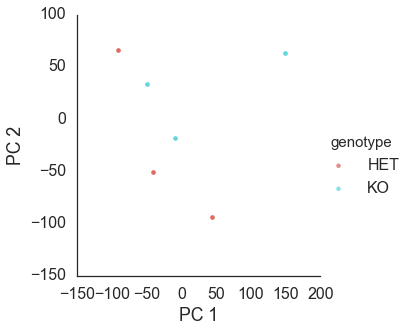

In [81]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[:,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='genotype', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':0.7}
                  );

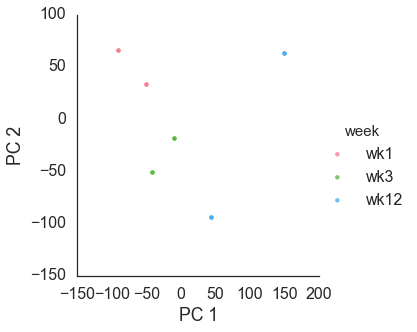

In [82]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[:,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='week', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':0.7}
                  );

# Feature Selection

## LogisticRegression method

- ran this a couple times manually and got varying numbers of features retained
- I decided to 
    - run it 100 times
    - count how frequently each feature is retained
    - keep the top X number of them

In [89]:
rlgrg = RandomizedLogisticRegression(C=1, scaling=0.5,
                                     sample_fraction=0.5, n_resampling=20,
                                     verbose=True, normalize=False,
                                     random_state=None, n_jobs=1,
                                     selection_threshold=0.25, tol=0.01                                     
                                    )
# rlgrg.fit(X_, y_)
 



In [90]:
y_encoded_geno

array([0, 1, 0, 1, 0, 1])

In [91]:
t1 = time.time()

itr = 1
f_sel_db = feature_selection.consensus_top10pct_feature_selection(X=X.iloc[:,2:], y=y_encoded_geno,
                                                      clf=rlgrg, names=None, iters=itr)

t2 = time.time()

ValueError: Found array with 0 sample(s) (shape=(0, 19227)) while a minimum of 1 is required.

In [ ]:
seconds = t2-t1
print(seconds)

In [ ]:
seconds/60

In [ ]:
len(f_sel_db)

In [ ]:
sns.distplot([len(l) for l in f_sel_db.values()], kde=False)
plt.xlabel('number of times a feature was retained');

### Look at the Features that were retained at least X times

In [ ]:
my_features = feature_selection.process_retained_features(retained=f_sel_db, iters=itr)
my_features.head()

In [ ]:
my_features.tail()

In [ ]:
my_features_ = my_features.sort_values(by='avg_score', axis=0, ascending=False).query("""retention_rate > 0.99""")
my_features_ = my_features_.query("""avg_score > 0.5 """)
my_features_.shape

In [ ]:
my_features_.head()

In [ ]:
my_features_.tail()

In [ ]:
X_best = X[my_features_.feature_names.values]
X_best.shape

In [ ]:
X_best

In [ ]:
top_n_sorted_features = 4

if top_n_sorted_features > X_best.shape[1]:
    raise ValueError("X_best.shape[1] is smaller than value provided for top_n_sorted_features.")

pca = PCA(n_components=2, whiten=False)
# pca = RandomizedPCA(n_components=2, whiten=False)

pca_t = pca.fit_transform(X_best.iloc[:,:top_n_sorted_features],y_disease_encoded_any)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
# print(pca_t_l)

In [ ]:
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['ExtentDisease'] = full_table['ExtentDisease']
pca_t_l['Disease_or_Normal'] = full_table['Disease_or_Normal']
# pca_t_l

In [ ]:
plot_alpha = 0.7

In [ ]:
with sns.color_palette(sns.color_palette("hls", 3)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='ExtentDisease', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

In [ ]:
top_10 = my_features_.iloc[:10,:]

# Test crossvalidation results and preditions on reduced data

In [ ]:
X_reduced = X[top_10.feature_names.values.astype(str)]

In [ ]:
top_10.feature_names.values.astype(str)

In [ ]:
X_reduced.head()

## split data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_disease_encoded_any,
                                                    test_size=0.33, random_state=42,
                                                    stratify=y_disease_encoded_any
                                                   )

# X_train, X_test, y_train, y_test = train_test_split(X, y_disease_encoded_spc,
#                                                     test_size=0.33, random_state=42,
#                                                     stratify=y_disease_encoded_spc
#                                                    )

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
y_disease_encoded_any

# Dummy Classifiers

In [ ]:
dummy_strat = DummyClassifier(strategy='stratified')
dummy_freq = DummyClassifier(strategy='most_frequent')
dummy_unif = DummyClassifier(strategy='uniform')
# dummy_constant = DummyClassifier(strategy='constant', constant=1)

In [ ]:
dummy_strat.fit(X_train, y_train)
dummy_freq.fit(X_train, y_train)
dummy_unif.fit(X_train, y_train)
# dummy_constant.fit(X_train, y_train)

## dummy_strat

In [ ]:
dummy_strat_cm = confusion_matrix(y_test,dummy_strat.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat confusion matrix",
                 norm=False, context=None, annot=True);

In [ ]:
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_freq

In [ ]:
dummy_freq_cm = confusion_matrix(y_test,dummy_freq.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq confusion matrix",
                 norm=False, context=None, annot=True);

In [ ]:
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_unif

In [ ]:
dummy_unif_cm = confusion_matrix(y_test,dummy_unif.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif confusion matrix",
                 norm=False, context=None, annot=True);

In [ ]:
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif normalized confusion matrix",
              norm=True, context=None, annot=True);

## SVM classifier

In [ ]:
SVC

In [ ]:
svc_param_grid = {'svc__C': 10. ** np.arange(-3, 3),
                  'svc__gamma': 10. ** np.arange(-3, 3)
                 }



svc_pipe = make_pipeline(SVC(kernel='linear', random_state=42))

# run the gridsearch to tune the hyper-parameters
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv=10)

svc_grid.fit(X_train, y_train)
print(svc_grid.best_params_)


# generate and plot confusion matrices
svc_cm = confusion_matrix(y_test,svc_grid.predict(X_test))



In [ ]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);


In [ ]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## RandomForest classifier

In [ ]:
rfst_param_grid = {'randomforestclassifier__n_estimators': np.arange(1,15,),
                   'randomforestclassifier__min_samples_leaf': np.arange(1,10,2)
                  }



rfst_pipe = make_pipeline(RandomForestClassifier(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
rfst_grid = GridSearchCV(rfst_pipe, param_grid=rfst_param_grid, cv=3)


rfst_grid.fit(X_train, y_train)
print(rfst_grid.best_params_)


# generate and plot confusion matrices
rfst_cm = confusion_matrix(y_test,rfst_grid.predict(X_test))

In [ ]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

In [ ]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## LogisticRegression classifier

In [ ]:
log_reg_param_grid = {'logisticregression__penalty': ['l1','l2'],
                     }



log_reg_pipe = make_pipeline(LogisticRegression(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
log_reg_grid = GridSearchCV(log_reg_pipe, param_grid=log_reg_param_grid, cv=5)


log_reg_grid.fit(X_train, y_train)
print(log_reg_grid.best_params_)


# generate and plot confusion matrices
log_reg_cm = confusion_matrix(y_test,log_reg_grid.predict(X_test))

In [ ]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm confusion matrix",
              norm=False, context=None, annot=True);

In [ ]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm normalized confusion matrix",
              norm=True, context=None, annot=True);

# What genes/probes did we recover?

In [ ]:
mapping_table_file = pd.read_excel('/home/gus/MEGAsync/zim/main/BCH/Projects/Jodie_and_James/comparison_gus_v2.xls')
mapping_table = mapping_table_file[['probes','GENE_SYMBOL']]

In [ ]:
mapping_table.head()

In [ ]:
my_probes = [x[1:] for x in X_reduced.columns.values]

In [ ]:
mapping_table[mapping_table.probes.apply(lambda x: x in my_probes)]